In [2]:
import sys

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [3]:
reload(sys)
sys.setdefaultencoding("utf-8")

load in the data

In [4]:
beers = pd.read_csv('../data/input/beers.csv')
breweries = pd.read_csv('../data/input/breweries.csv')
ftiso = pd.read_csv('../data/input/ftiso.csv')

comparing untappd rating of russian river against other breweries

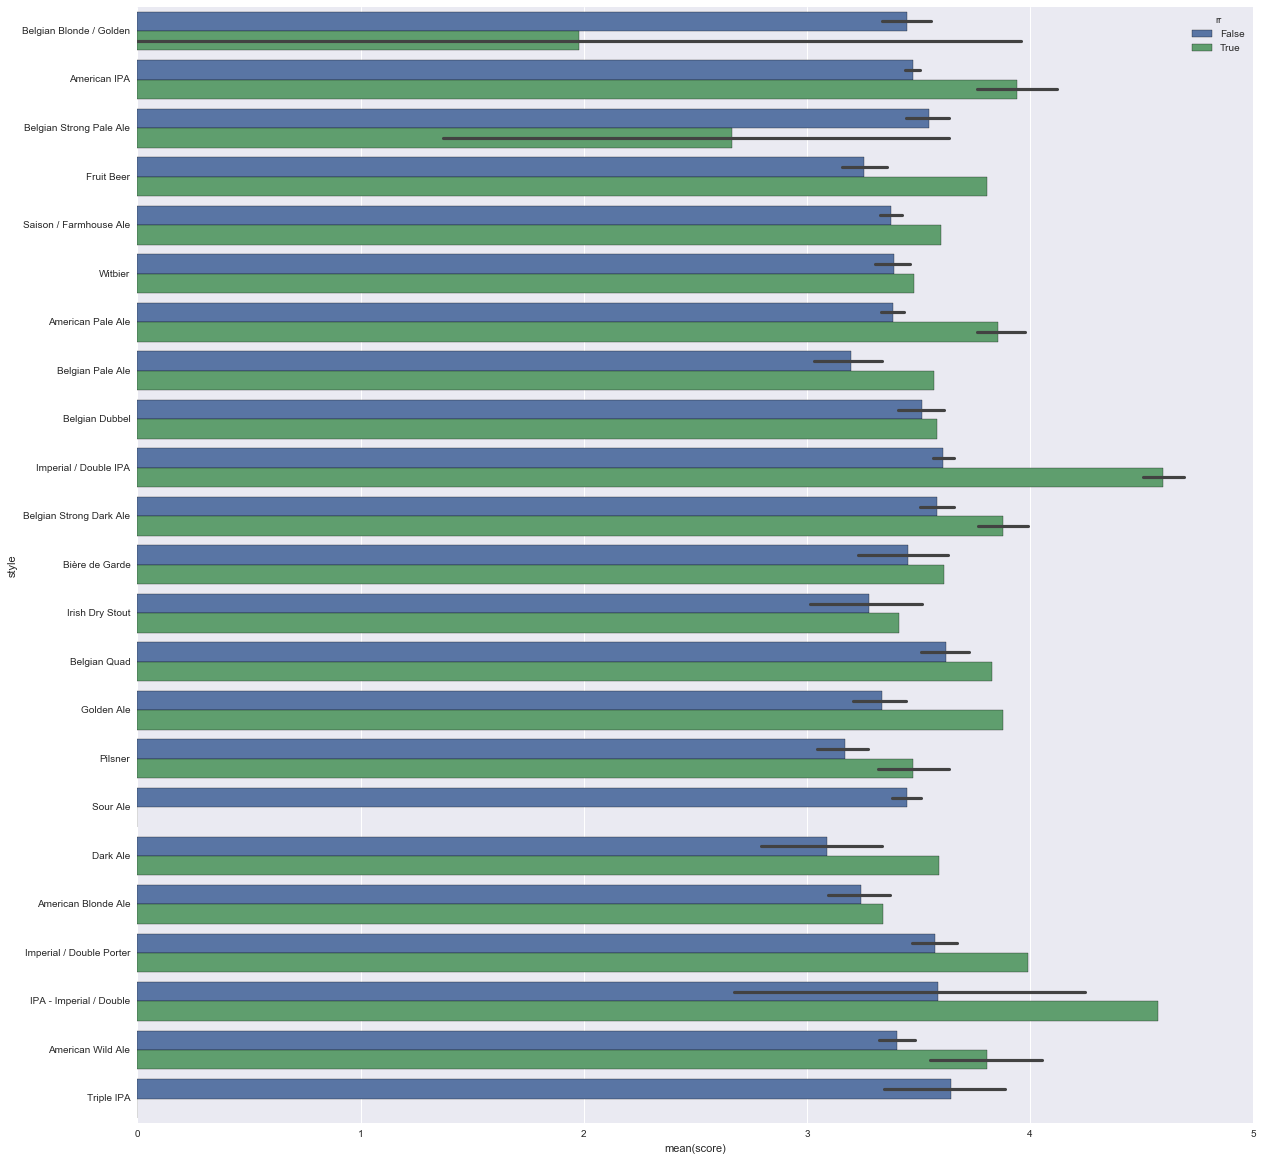

In [5]:
# prep data
beers['rr'] = beers['brewery_name'] == 'Russian River Brewing Company'
included_styles = beers.groupby('style').sum() > 0
included_styles = included_styles[included_styles['rr'] > 0].index
beer_mask = beers['style'].isin(included_styles)

# plot barplot
plt.figure(figsize=(20, 20))
sns.barplot(y='style', x='score', hue='rr', data=beers[beer_mask])
plt.show()

compare iso count

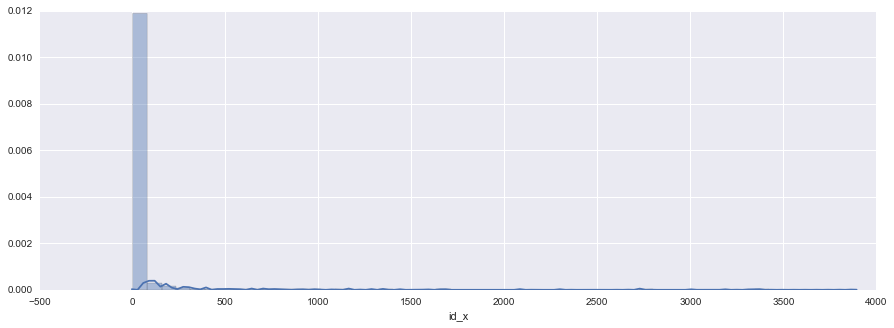

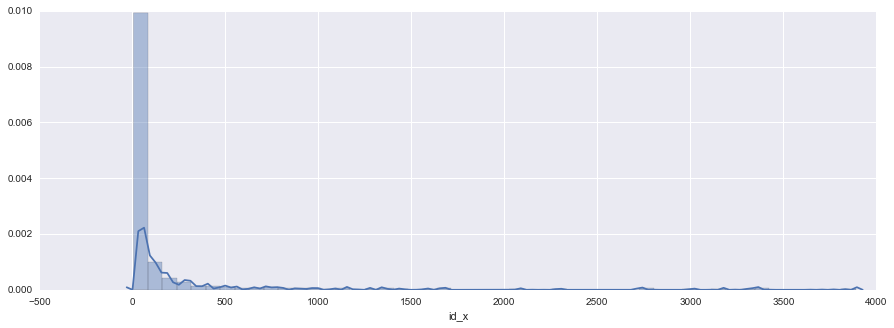

In [13]:
# prep data
iso = ftiso[ftiso['type'] == 'iso']
iso = iso.merge(beers, left_on='beer_id', right_on='id')
iso = iso.groupby('brewery_name').count()
rr_iso = iso[iso.index == 'Russian River Brewing Company']['id_x'][0]
all_iso = iso['id_x'].mean()

# plot data
plt.figure(1, figsize=(15,5))
sns.distplot(iso['id_x'])
plt.show()
plt.figure(2, figsize=(15,5))
sns.distplot(iso[iso['id_x'] > 5]['id_x'])
plt.show()

print rr_iso
print all_iso

In [21]:
rr_iso

3889

In [22]:
all_iso

51.034167175106774